In [1]:
library('rethinking')

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




### 2M1.

Recall the globe tossing model from the chapter. Compute and plot the grid approximate
posterior distribution for each of the following sets of observations. In each case, assume a uniform
prior for p.

(1) W, W, W

(2) W, W, W, L

(3) L, W, W, L, W, W, W

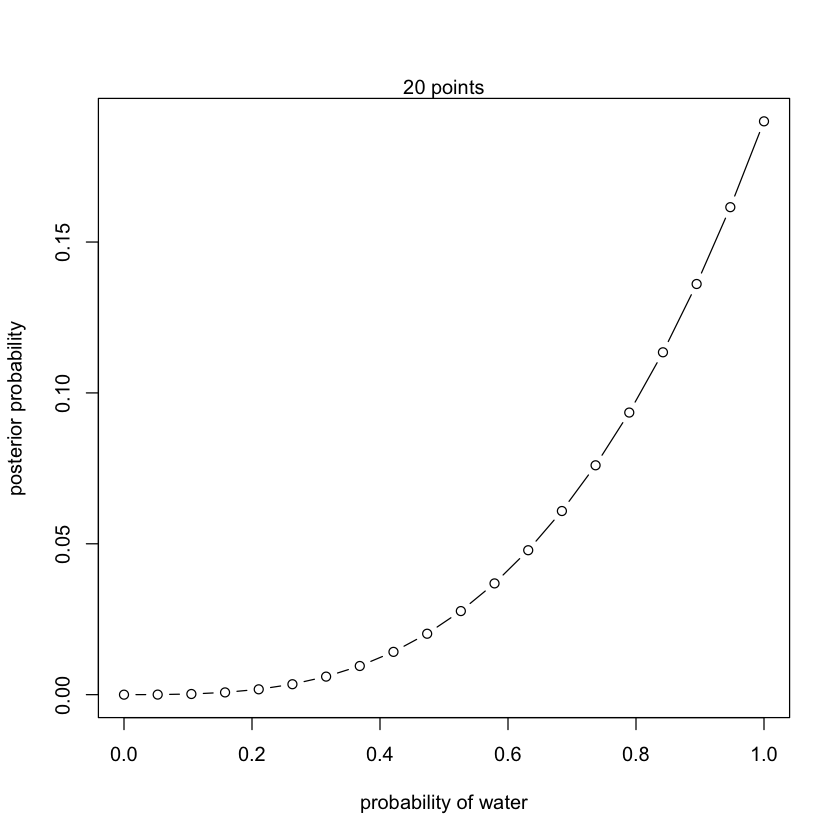

In [3]:
# 2M1 1) W, W, W
p_grid <- seq(from=0, to=1, length.out = 20)
prior <- rep(1, 20)
likelihood <- dbinom(3, size=3, prob=p_grid) #3 trials and 3 heads
unstd.posterior<-likelihood*prior
posterior <- unstd.posterior/sum(unstd.posterior)
plot(p_grid, posterior, type = "b", xlab = "probability of water", ylab = "posterior probability")
mtext("20 points")

In [4]:
PosteriorCalc <- function(W, n, p_grid, prior){
    likelihood <- dbinom(W, size=n, prob=p_grid) #3 trials and 3 heads
    unstd.posterior<-likelihood*prior
    posterior <- unstd.posterior/sum(unstd.posterior)
    plot(p_grid, posterior, type = "b", xlab = "probability of water", ylab = "posterior probability")
    mtext("20 points")
    }

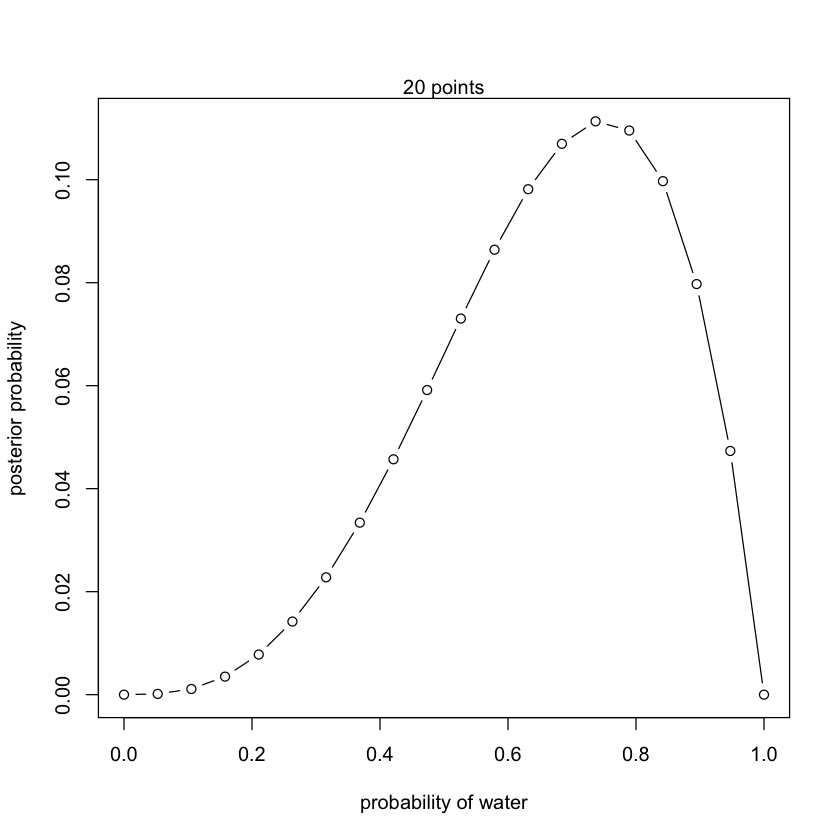

In [5]:
PosteriorCalc(3, 4, p_grid, prior) #WWWL

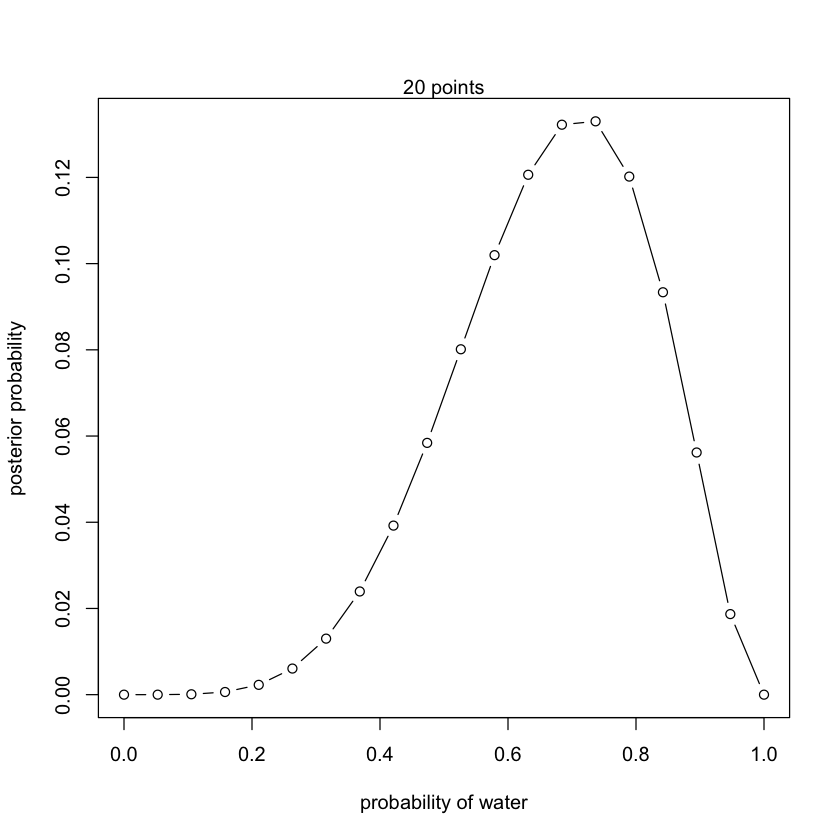

In [6]:
PosteriorCalc(5, 7, p_grid, prior)

### 2M2.

Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when
p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

In [7]:
prior = ifelse(p_grid<0.5, 0, 0.5)

In [8]:
prior

[1] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
[20] 0.5

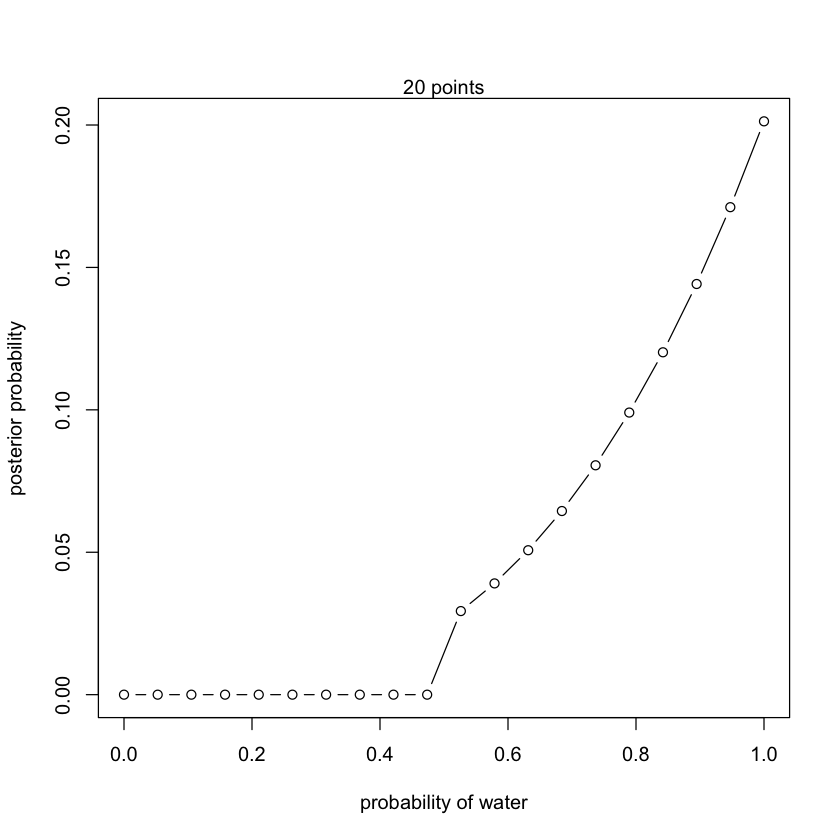

In [10]:
PosteriorCalc(3, 3, p_grid, prior) #WWW

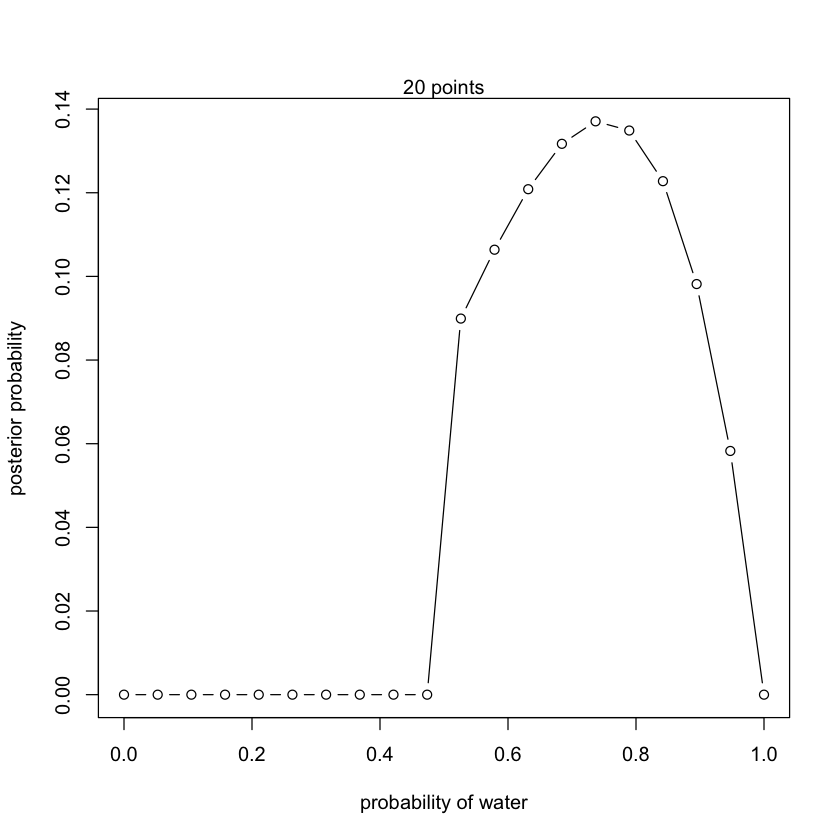

In [9]:
PosteriorCalc(3, 4, p_grid, prior) #WWWL

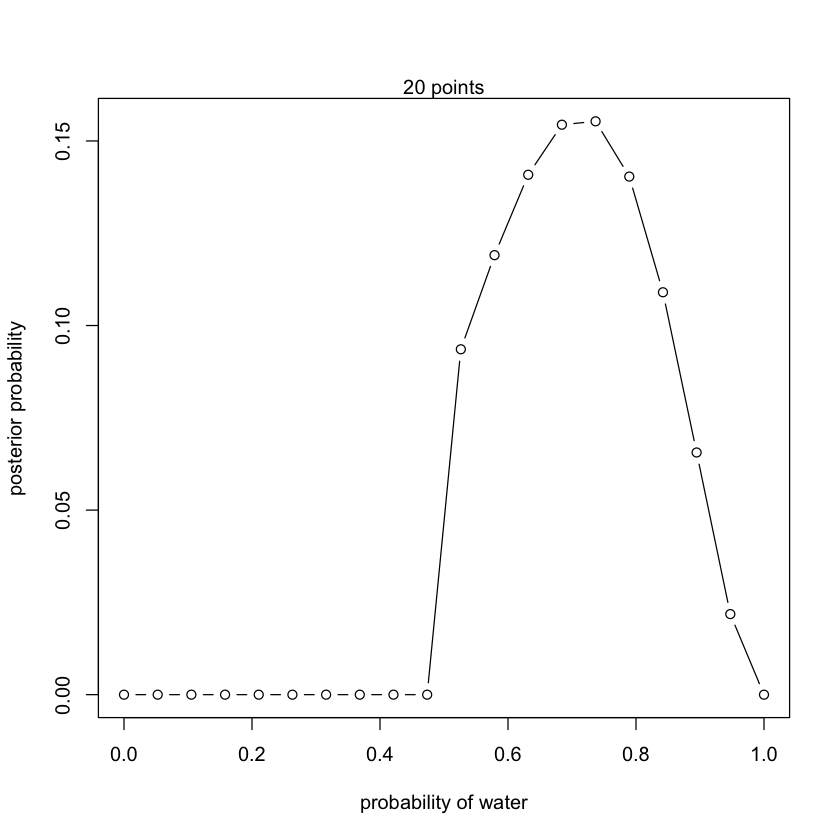

In [11]:
PosteriorCalc(5, 7, p_grid, prior) #WWWL